https://scipy-lectures.org/intro/scipy.html

# File input/output

In [3]:
import numpy as np
from scipy import io as spio
from matplotlib import pyplot as plt
# %matplotlib widget

In [29]:
a = np.ones((3, 3))
spio.savemat('data/file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('data/file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [30]:
from scipy import misc

misc.imread('data.fname.png')

AttributeError: module 'scipy.misc' has no attribute 'imread'

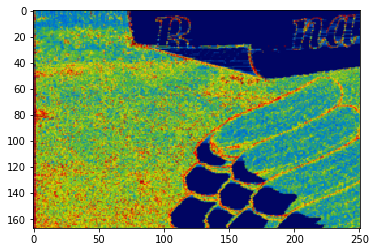

In [98]:
# Matplotlib also has a similar function
import matplotlib.pyplot as plt
im = plt.imread('data/fname.png')
plt.imshow(im)

# Linear algebra operations

In [32]:
from scipy import linalg

In [33]:
# Determinant of a square matrix
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)

-2.0

In [34]:
arr = np.array([[3, 2],
                [6, 4]])
linalg.det(arr) 

0.0

In [35]:
linalg.det(np.ones((3, 4)))

ValueError: expected square matrix

In [36]:
# the inverse of a square matrix
arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [37]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [38]:
# computing the inverse of a singular matrix (its determinant is zero) will raise LinAlgError
arr = np.array([[3, 2],
                [6, 4]])
linalg.inv(arr)  

LinAlgError: singular matrix

In [39]:
# singular-value decomposition (SVD)
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [40]:
spec

array([14.88982544,  0.45294236,  0.29654967])

In [41]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

# Interpolation

In [42]:
from scipy.interpolate import interp1d

In [43]:
1e-1

0.1

In [44]:
# By imagining experimental data close to a sine function
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [45]:
linear_interp = interp1d(measured_time, measures)

In [46]:
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

In [47]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

In [48]:
linear_results

array([ 0.05313296,  0.1741474 ,  0.29516184,  0.41617628,  0.53719071,
        0.65820515,  0.73858828,  0.78646636,  0.83434444,  0.88222252,
        0.9301006 ,  0.97072503,  0.95332024,  0.93591546,  0.91851067,
        0.90110589,  0.8837011 ,  0.8136479 ,  0.7172705 ,  0.62089309,
        0.52451569,  0.42813828,  0.32313811,  0.18795828,  0.05277846,
       -0.08240137, -0.2175812 , -0.35276103, -0.44528135, -0.52561323,
       -0.60594512, -0.686277  , -0.76660888, -0.82875856, -0.85454383,
       -0.8803291 , -0.90611437, -0.93189964, -0.95768491, -0.90191703,
       -0.835955  , -0.76999296, -0.70403093, -0.6380689 , -0.56020662,
       -0.46746903, -0.37473144, -0.28199386, -0.18925627, -0.09651868])

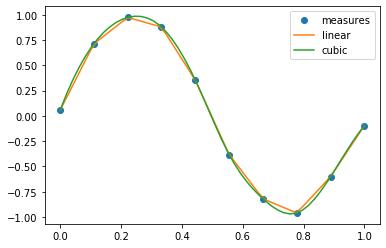

In [49]:
plt.plot(measured_time, measures, 'o', label='measures')
plt.plot(interpolation_time, linear_results, label='linear')
plt.plot(interpolation_time, cubic_results, label='cubic')
plt.legend()

# Optimization and fit

In [50]:
from scipy import optimize

In [51]:
# Suppose we have data on a sine wave, with some noise
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

In [52]:
def test_func(x, a, b):
    return a * np.sin(b * x)

In [53]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

[2.7150889  1.46430474]


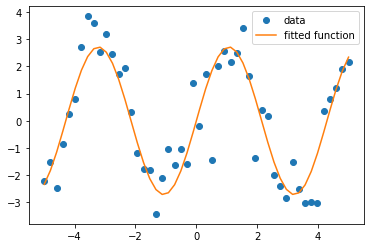

In [54]:
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x_data, test_func(x_data, *params), label='fitted function')
plt.legend()

In [55]:
test_func(x)

TypeError: test_func() missing 2 required positional arguments: 'a' and 'b'

## Exercise

In [56]:
temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12) + 1

Text(0, 0.5, 'Min and max temperature')

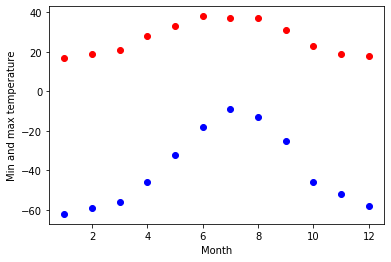

In [57]:
plt.plot(months, temp_min, 'bo')
plt.plot(months, temp_max, 'ro')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [58]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

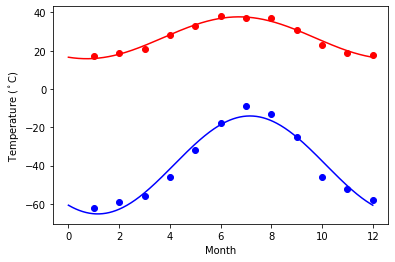

In [59]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [60]:
params, params_covariance = optimize.curve_fit(test_func, months, min_t)
print(params)

NameError: name 'min_t' is not defined

# Finding the minimum of a scalar function

In [ ]:
def f(x):
    return x**2 + 10*np.sin(x)

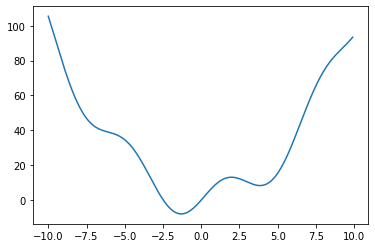

In [61]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

In [62]:
result = optimize.minimize(f, x0=0)
result 

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [63]:
result.x # The coordinate of the minimum  

array([-1.30644012])

In [64]:
optimize.minimize(f, x0=0, method="L-BFGS-B")  

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.50990331e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644014])

In [65]:
# Global minimum: A possible issue with this approach is that, 
# if the function has local minima, the algorithm may 
# find these local minima instead of the global minimum depending on the initial point x0:
res = optimize.minimize(f, x0=3, method="L-BFGS-B")
res.x

array([3.83746709])

In [66]:
# combines a local optimizer with sampling of starting points
optimize.basinhopping(f, 0)  

                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[0.08585804]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1512
                        nit: 100
                       njev: 504
                          x: array([-1.30644])

In [67]:
res = optimize.minimize(f, x0=1, bounds=((0, 10), ))
res.x

array([0.])

## Exercise

In [68]:
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2)

In [69]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-1, 1, 0.1)

In [70]:
xg, yg = np.meshgrid(x, y)

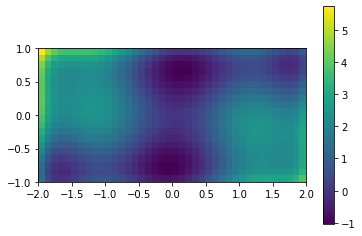

In [71]:
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

Text(0.5, 0.92, 'Six-hump Camelback function')

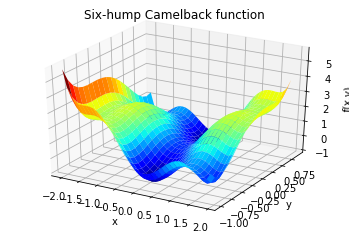

In [89]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Six-hump Camelback function')

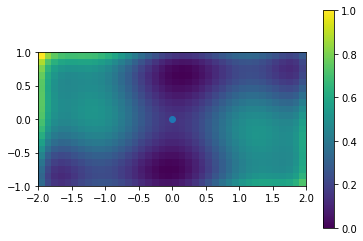

In [73]:
x_min = optimize.minimize(sixhump, x0=[0, 0])
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.scatter(x_min.x[0], x_min.x[1])
plt.colorbar()

## Finding the roots of a scalar function

To find a root, i.e. a point where f(x) = 0, of the function f above we can use scipy.optimize.root()

In [75]:
root = optimize.root(f, x0=1)  # our initial guess is 1
root    # The full result

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

In [76]:
root.x  # Only the root found

array([0.])

In [77]:
root2 = optimize.root(f, x0=-2.5)
root2.x

array([-2.47948183])

#### Full example

In [90]:
x = np.arange(-10, 10, 0.1)
def f(x):
    return x**2 + 10*np.sin(x)

In [91]:
# Global optimization
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s" % xmin_global)

# Constrain optimization
xmin_local = optimize.fminbound(f, 0, 10)
print("Local minimum found %s" % xmin_local)

Global minima found [-1.30641113]
Local minimum found 3.8374671194983834


In [92]:
root = optimize.root(f, 1)  # our initial guess is 1
print("First root found %s" % root.x)
root2 = optimize.root(f, -2.5)
print("Second root found %s" % root2.x)

First root found [0.]
Second root found [-2.47948183]


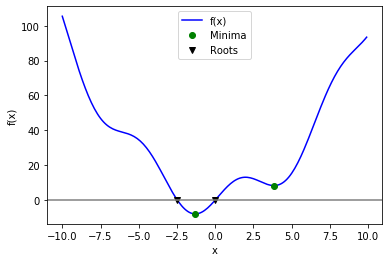

In [93]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')
plt.show()

# Statistics and random numbers
The module scipy.stats contains statistical tools and probabilistic descriptions of random processes. <br>
Random number generators for various random process can be found in numpy.random.

## Distributions: histogram and probability density function

Given observations of a random process, their histogram is an estimator of the random process’s PDF (probability density function):

In [205]:
# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

In [206]:
# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, normed=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

/Users/alex/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


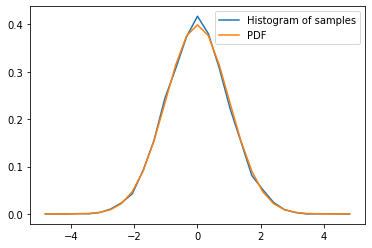

In [211]:
# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = stats.norm.pdf(bin_centers)

plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

In [115]:
loc, std = stats.norm.fit(samples)
loc

-0.0014379480061897673

In [116]:
std

0.97540656338697

## Excersize

In [221]:
samples = np.random.gamma(1, size=10000)

In [230]:
# Compute a histogram of the sample
bins = np.linspace(-2, 6, 100)
histogram, bins = np.histogram(samples, bins=bins, normed=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

/Users/alex/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


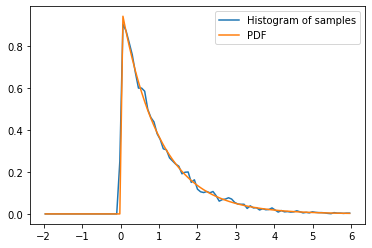

In [231]:
pdf = stats.gamma.pdf(bin_centers, 1)

plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

In [232]:
# returns MLEs for shape (if applicable), location, and scale parameters from data
stats.gamma.fit(samples)

(1.0071760657970223, 9.067631359836986e-05, 0.9907686908278877)

## Mean, median and percentiles

In [233]:
np.mean(samples)     

0.9979675255337308

In [234]:
np.median(samples)    

0.6902939676314956

In [237]:
# same as median
stats.scoreatpercentile(samples, 50)

0.6902939676314956

In [236]:
stats.scoreatpercentile(samples, 90)     

2.3214529357968927

The percentile is an estimator of the CDF: __cumulative distribution function__.

## Statistical tests

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a T-test to decide whether the means of two sets of observations are significantly different:

In [239]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)  

Ttest_indResult(statistic=-3.6679937075465996, pvalue=0.000381266431507871)

The resulting output is composed of:
- The T statistic value: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
- the p value: the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means. 

# Numerical integration

## Function integrals
The most generic integration routine is scipy.integrate.quad()

$\int\limits_{0}^{\pi/2} sin(t)dt$

In [95]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)   # res is the result, is should be close to 1

True

In [96]:
np.allclose(err, 1 - res)  # err is an estimate of the err

True

## Integrating differential equations

scipy.integrate also features routines for integrating Ordinary Differential Equations (ODE). In particular, scipy.integrate.odeint() solves ODE of the form:

$\frac{dy}{dt} = rhs(y1, y2, .., t0,...)$


As an introduction, let us solve the ODE $\frac{dy}{dt} = -2 y$ between $t = 0 \dots 4$, with the initial condition $y(t=0) = 1$. First the function computing the derivative of the position needs to be defined:

In [1]:
def calc_derivative(ypos, time):
    return -2 * ypos

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


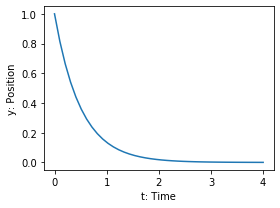

In [7]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, y0=1, t=time_vec)

plt.figure(figsize=(4, 3))
plt.plot(time_vec, yvec)
plt.xlabel('t: Time')
plt.ylabel('y: Position')
plt.tight_layout()

Let us integrate a more complex ODE: a damped spring-mass oscillator. The position of a mass attached to a spring obeys the 2nd order ODE $y'' + 2 \varepsilon \omega_0  y' + \omega_0^2 y = 0$ with $\omega_0^2 = k/m$ with $k$ the spring constant, $m$ the mass and $\varepsilon = c/(2 m \omega_0)$  with $c$ the damping coefficient. We set:

In [9]:
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m

In [10]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

In [11]:
eps < 1

True

For odeint(), the 2nd order equation needs to be transformed in a system of two first-order equations for the vector $Y = (y, y')$: the function computes the velocity and acceleration:

In [12]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])

In [13]:
time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))

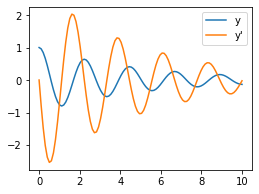

In [14]:
plt.figure(figsize=(4, 3))
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend(loc='best')
plt.show()

# Fast Fourier transforms

The scipy.fftpack module computes fast Fourier transforms (FFTs) and offers utilities to handle them. The main functions are:

- `scipy.fftpack.fft()` to compute the FFT
- `scipy.fftpack.fftfreq()` to generate the sampling frequencies
- `scipy.fftpack.ifft()` computes the inverse FFT, from frequency space to signal space

As an illustration, a (noisy) input signal (sig), and its FFT:

## Signal example

### Generate the signal

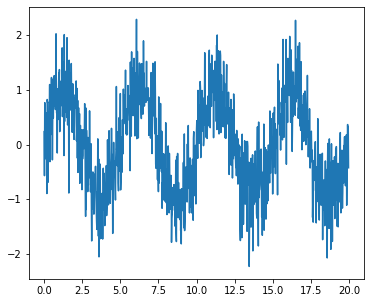

In [20]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

### Compute and plot the power

[]

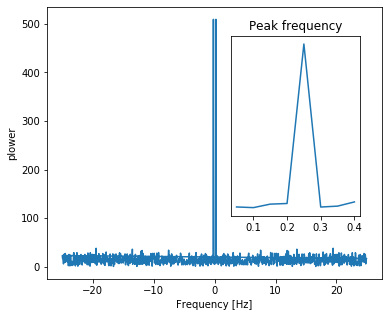

In [21]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

### Remove all the high frequencies

/Users/alex/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


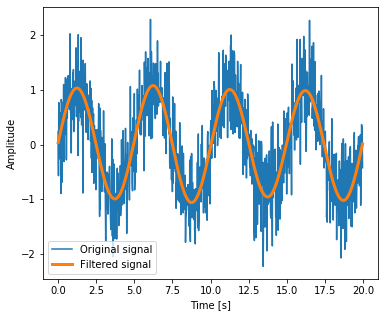

In [23]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

## Simple image blur by convolution with a Gaussian kernel


Convolution is easy to perform with FFT: convolving two signals boils down to multiplying their FFTs (and performing an inverse FFT).

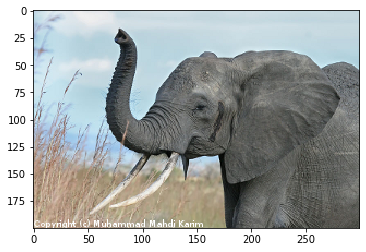

In [24]:
# read image
img = plt.imread('./data/elephant.png')
plt.figure()
plt.imshow(img)

In [26]:
# Prepare an Gaussian convolution kernel

# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

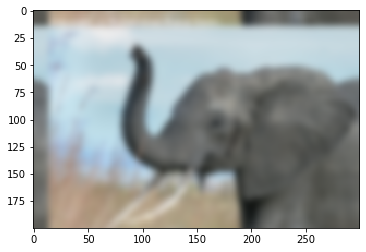

In [29]:
# Padded fourier transform, with the same shape as the image
# We use :func:`scipy.signal.fftpack.fft2` to have a 2D FFT
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
# the 'newaxis' is to match to color direction
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.figure()
plt.imshow(img2)

### A function to do it: scipy.signal.fftconvolve()

The above exercise was only for didactic reasons: there exists a function in scipy that will do this for us, and probably do a better job: `scipy.signal.fftconvolve()`

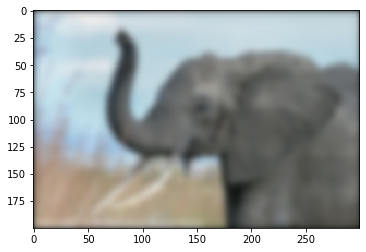

In [30]:
from scipy import signal
# mode='same' is there to enforce the same output shape as input arrays
# (ie avoid border effects)
img3 = signal.fftconvolve(img, kernel[:, :, np.newaxis], mode='same')
plt.figure()
plt.imshow(img3)

## Excersize: Denoise moon landing image

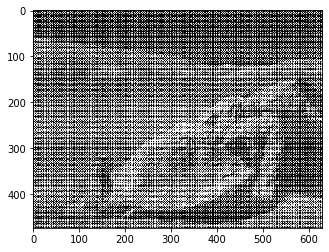

In [51]:
# read image
im = plt.imread('./data/moonlanding.png')
plt.figure()
plt.imshow(im, plt.cm.gray)

Text(0.5, 1.0, 'Fourier transform')

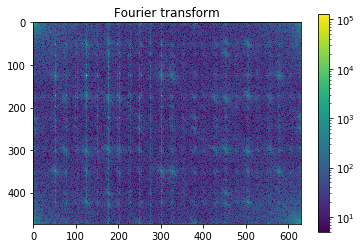

In [48]:
# The corresponding frequencies
im_fft = fftpack.fft2(im)

# Show the results
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

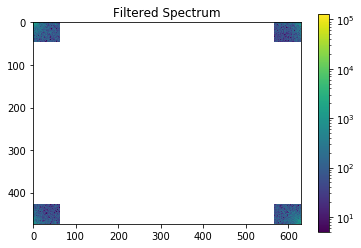

In [59]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

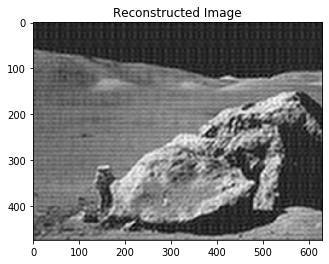

In [60]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Implementing filtering directly with FFTs is tricky and time consuming. We can use the Gaussian filter from scipy.ndimage

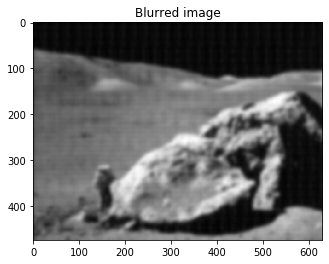

In [65]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()

# Signal processing

Resampling scipy.signal.resample(): resample a signal to n points using FFT.

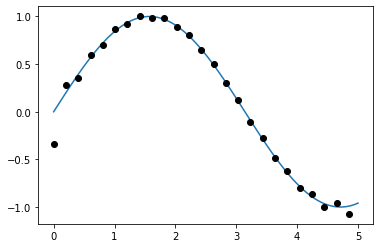

In [70]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

from scipy import signal
x_resampled = signal.resample(x, 25)

plt.plot(t, x) 
plt.plot(t[::4], x_resampled, 'ko')

Detrending scipy.signal.detrend(): remove linear trend from signal:

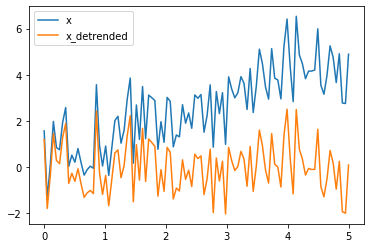

In [72]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

from scipy import signal
x_detrended = signal.detrend(x)

plt.plot(t, x, label='x') 

plt.plot(t, x_detrended, label='x_detrended') 
plt.legend()

### Spectrogram, power spectral density

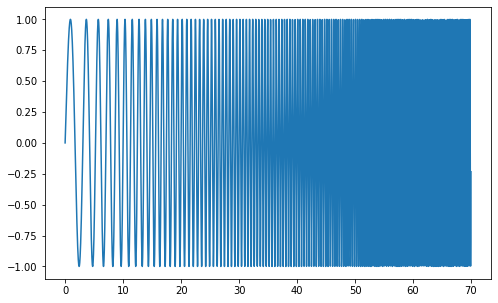

In [74]:
# Seed the random number generator
np.random.seed(0)

time_step = .01
time_vec = np.arange(0, 70, time_step)

# A signal with a small frequency chirp
sig = np.sin(0.5 * np.pi * time_vec * (1 + .1 * time_vec))

plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)

### Compute and plot the spectrogram

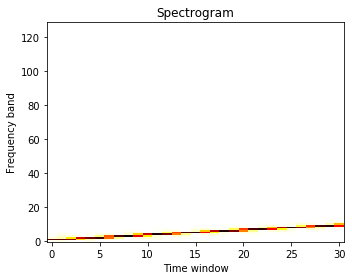

In [75]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(sig)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

### Compute and plot the power spectral density (PSD)

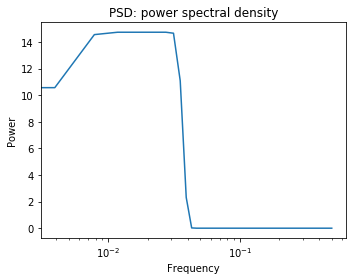

In [76]:
freqs, psd = signal.welch(sig)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

# Image manipulation

##  Geometrical transformations on images

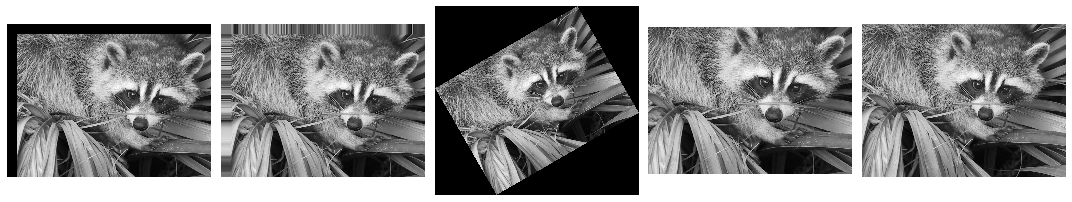

In [78]:
from scipy import misc  # Load an image
face = misc.face(gray=True)

from scipy import ndimage # Shift, roate and zoom it
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

## Image filtering

In [97]:
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:]  # crop out square on right
import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)

In [98]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
from scipy import signal
wiener_face = signal.wiener(noisy_face, (5, 5))

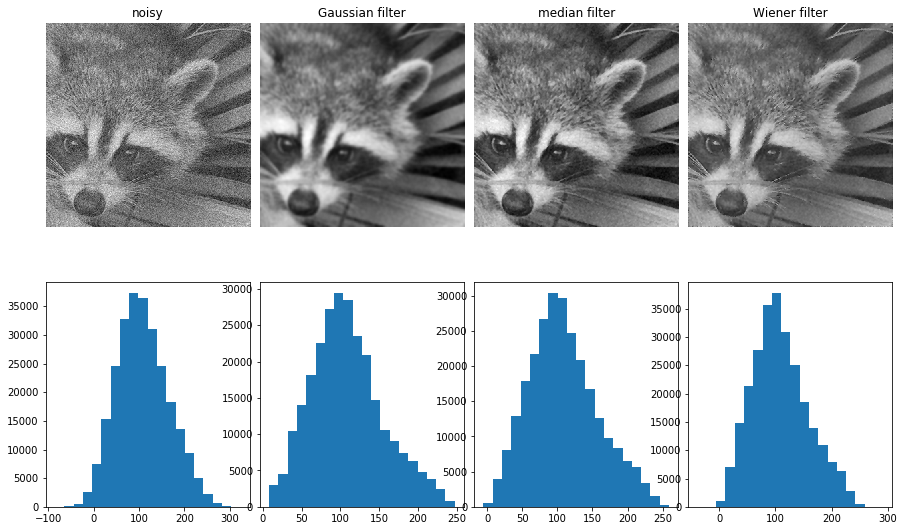

In [105]:
plt.figure(figsize=(12, 7))
plt.subplot(241)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(242)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(243)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(244)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')

plt.subplot(245)
plt.hist(noisy_face.ravel(), bins=20)

plt.subplot(246)
plt.hist(blurred_face.ravel(), bins=20)

plt.subplot(247)
plt.hist(median_face.ravel(), bins=20)

plt.subplot(248)
plt.hist(wiener_face.ravel(), bins=20)

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

## Mathematical morphology

The erosion of the dark-blue square by a disk, resulting in the light-blue square.

The closing of the dark-blue shape (union of two squares) by a disk, resulting in the union of the dark-blue shape and the light-blue areas.

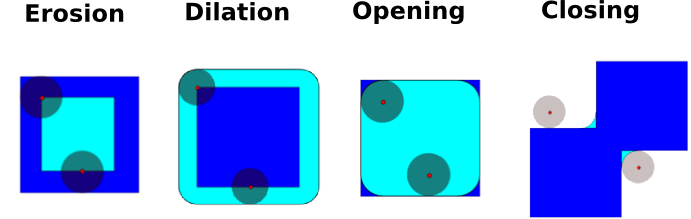

In [106]:
el = ndimage.generate_binary_structure(2, 1)
el 

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]])

In [107]:
el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [108]:
# Erosion scipy.ndimage.binary_erosion()
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [109]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [111]:
#Erosion removes objects smaller than the structure
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [112]:
# Dilation scipy.ndimage.binary_dilation()
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [113]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [114]:
# Opening scipy.ndimage.binary_opening()
a = np.zeros((5, 5), dtype=np.int)
a[1:4, 1:4] = 1
a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [115]:
# Opening removes small objects
ndimage.binary_opening(a, structure=np.ones((3, 3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [116]:
# Opening can also smooth corners
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

### Exerxise

Check that opening amounts to eroding, then dilating.

In [117]:
a = np.zeros((5, 5), dtype=np.int)
a[1:4, 1:4] = 1
a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [121]:
a = ndimage.binary_erosion(a, structure=np.ones((3, 3))).astype(a.dtype)
a

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [122]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

### #2

In [123]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)

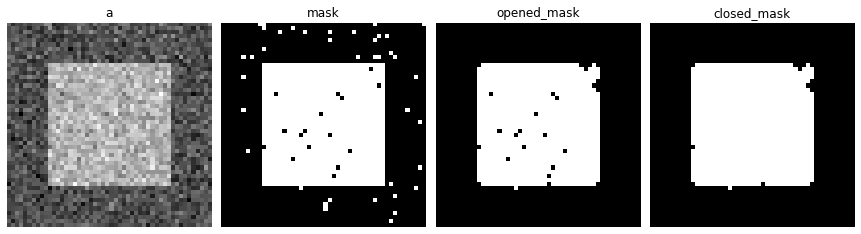

In [124]:
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap=plt.cm.gray)
plt.axis('off')
plt.title('a')

plt.subplot(142)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')

plt.subplot(143)
plt.imshow(opened_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('opened_mask')

plt.subplot(144)
plt.imshow(closed_mask, cmap=plt.cm.gray)
plt.title('closed_mask')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

In [135]:
closed_mask[closed_mask == 1].shape

(887,)

In [134]:
mask[mask == 1].shape

(923,)

### Grey scale

In [125]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 1:6] = 3
a[4, 4] = 2; a[2, 3] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 1, 3, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 3, 2, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [126]:
ndimage.grey_erosion(a, size=(3, 3))

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 3, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

# Connected components and measurements on images

Let us first generate a nice synthetic binary image.

In [136]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1

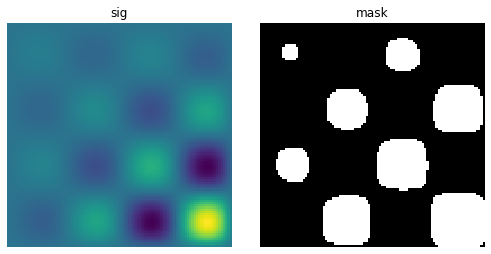

In [137]:
plt.figure(figsize=(7, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(sig)
plt.axis('off')
plt.title('sig')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

In [140]:
from scipy import ndimage
labels, nb = ndimage.label(mask)
nb

8

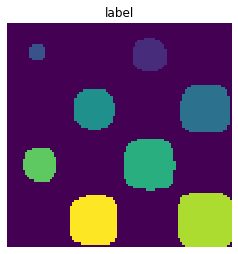

In [138]:
plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title('label')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

In [141]:
areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
areas   # The number of pixels in each connected component

array([190.,  45., 424., 278., 459., 190., 549., 424.])

In [142]:
maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
maxima  # The maximum signal in each connected component

array([ 1.80238238,  1.13527605,  5.51954079,  2.49611818,  6.71673619,
        1.80238238, 16.76547217,  5.51954079])

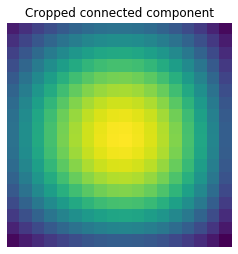

In [139]:
sl = ndimage.find_objects(labels==4)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(sig[sl[0]])
plt.title('Cropped connected component')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

plt.show()